In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib as plb
import seaborn as sns
from scipy import stats
import statistics
import dabest as db

In [14]:
p1 = pd.read_csv('D:/_2021_08_screen/S1fu/S1fuPlate1.csv')
p1s = p1.iloc[range(6)]
p1s = p1s.melt(id_vars=['Let'], var_name= 'Col', value_name= 'Compound')
p1s['CPID'] = 'P1'

In [15]:
p2 = pd.read_csv('D:/_2021_08_screen/S1fu/S1fuPlate2.csv')
p2s = p2.iloc[range(6)]
p2s = p2s.melt(id_vars=['Let'], var_name= 'Col', value_name= 'Compound')
p2s['CPID'] = 'P2'

In [2]:
ckey = pd.read_csv('C:/Users/Emily/Documents/_2021_08_screen/S1fu/ckey.csv', index_col=0)
ckey.head()

,Let,Col,Compound,CPID,Compound Well
0,B,2,Isoamyl alcohol,P1,B2
6,B,3,"2,3-Dihydrobenzofuran",P1,B3
12,B,4,Piperitenone,P1,B4
18,B,5,Guaiazulene,P1,B5
24,B,2,Methyl palmitate,P2,B2


In [3]:
md = pd.read_csv('C:/Users/Emily/Desktop/current_analysis/S1F2/S1F2_md.csv', delimiter=',', encoding='utf-8-sig')
#md.drop(md.columns[[3, 4, 12, 13, 16, 17]], axis = 1, inplace = True)
md['CPID'] = md['Compound library ID'].str[2:4]
md.head()


,-,Recorder,Plate ID,Different strains in each well of a single assay plate? (Y/N),Different compounds in each well of a single assay plate? (Y/N),Compound library ID,Compound Well A,Compound Well B,Compound Well C,Compound Well D,...,Chemotaxis End (24 hrs format),Image ID,Scanner Slot:,Scanner Slot,Scanner #,Strain Well A,Strain Well B,Strain Well C,Strain Well D,CPID
0,3/8/2022,CHANDNI,S1F2_R1_1,NaN,NaN,D1P2,B2,B3,B4,B5,...,2:30,S1F2_001,1,NaN,3,GN960,GN960,GN960,GN960,P2
1,3/8/2022,CHANDNI,S1F2_R1_2,NaN,NaN,D1P2,C2,C3,C4,C5,...,2:30,S1F2_001,2,NaN,3,GN960,GN960,GN960,GN960,P2
2,3/8/2022,CHANDNI,S1F2_R1_3,NaN,NaN,D1P2,D2,D3,D4,D5,...,2:30,S1F2_001,3,NaN,3,GN960,GN960,GN960,GN960,P2
3,3/8/2022,CHANDNI,S1F2_R1_4,NaN,NaN,D1P2,E2,E3,E4,E5,...,2:30,S1F2_001,4,NaN,3,GN960,GN960,GN960,GN960,P2
4,3/8/2022,CHANDNI,S1F2_R1_5,NaN,NaN,D1P2,F2,F3,F4,F5,...,2:30,S1F2_002,1,NaN,4,GN960,GN960,GN960,GN960,P2


In [4]:
md['Scanner Slot:'] = md['Scanner Slot:'].apply(str)

In [5]:
df_obj = md.select_dtypes(['object', 'string'])
md = md[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())
md.head()

,-,Recorder,Plate ID,Compound library ID,Compound Well A,Compound Well B,Compound Well C,Compound Well D,Chemotaxis Start (24 hrs format),Chemotaxis End (24 hrs format),Image ID,Scanner Slot:,Strain Well A,Strain Well B,Strain Well C,Strain Well D,CPID
0,3/8/2022,CHANDNI,S1F2_R1_1,D1P2,B2,B3,B4,B5,1:30,2:30,S1F2_001,1,GN960,GN960,GN960,GN960,P2
1,3/8/2022,CHANDNI,S1F2_R1_2,D1P2,C2,C3,C4,C5,1:30,2:30,S1F2_001,2,GN960,GN960,GN960,GN960,P2
2,3/8/2022,CHANDNI,S1F2_R1_3,D1P2,D2,D3,D4,D5,1:30,2:30,S1F2_001,3,GN960,GN960,GN960,GN960,P2
3,3/8/2022,CHANDNI,S1F2_R1_4,D1P2,E2,E3,E4,E5,1:30,2:30,S1F2_001,4,GN960,GN960,GN960,GN960,P2
4,3/8/2022,CHANDNI,S1F2_R1_5,D1P2,F2,F3,F4,F5,1:30,2:30,S1F2_002,1,GN960,GN960,GN960,GN960,P2


In [6]:
md = md.fillna('Empty')
md.tail()

,-,Recorder,Plate ID,Compound library ID,Compound Well A,Compound Well B,Compound Well C,Compound Well D,Chemotaxis Start (24 hrs format),Chemotaxis End (24 hrs format),Image ID,Scanner Slot:,Strain Well A,Strain Well B,Strain Well C,Strain Well D,CPID
34,3/17/2022,Ehsan,S1F2_R3_11,D3P1,F2,F3,F4,F5,2:45,3:45,S1F2_009,3,GN960,GN960,GN960,GN960,P1
35,3/17/2022,Ehsan,S1F2_R3_12,D3P1,G2,G3,G4,G5,2:45,3:45,S1F2_009,4,GN960,GN960,GN960,GN960,P1
36,3/21/2022,EMILY,S1F2_R4_1,D4P1,F5,G3,G2,F4,10:55,11:55,S1F2_010,1,GN960,GN960,GN960,GN960,P1
37,3/21/2022,EMILY,S1F2_R4_2,D4P1,E2,C4,E4,B3,10:55,11:55,S1F2_010,2,GN960,GN960,GN960,GN960,P1
38,3/21/2022,EMILY,S1F2_R4_3,D4P2,D4,F2,Empty,Empty,10:55,11:55,S1F2_010,3,GN960,GN960,GN960,GN960,P2


In [7]:
def add_compoundA(row, compound_map):
    if row['Compound Well A'] != 'Empty':
        compound = compound_map.loc[
            (compound_map['CPID']==row['CPID']) & 
            (compound_map['Compound Well']==row['Compound Well A'])]['Compound']
        return compound.values[0]
    else:
        return "Empty"
    
def add_compoundB(row, compound_map ):
    if row['Compound Well B'] != 'Empty':
        compound = compound_map.loc[
            (compound_map['CPID']==row['CPID']) & 
            (compound_map['Compound Well']==row['Compound Well B'])]['Compound']
        return compound.values[0]
    else:
        return "Empty"

def add_compoundC(row, compound_map ):
    if row['Compound Well C'] != 'Empty':
        compound = compound_map.loc[
            (compound_map['CPID']==row['CPID']) & 
            (compound_map['Compound Well']==row['Compound Well C'])]['Compound']
        return compound.values[0]
    else:
        return "Empty"

def add_compoundD(row, compound_map ):
    if row['Compound Well D'] != 'Empty':
        compound = compound_map.loc[
            (compound_map['CPID']==row['CPID']) & 
            (compound_map['Compound Well']==row['Compound Well D'])]['Compound']
        return compound.values[0]
    else:
        return "Empty"


In [8]:
md['Compound A'] = md.apply(
    lambda row: add_compoundA(row, ckey), axis=1)

In [9]:
md['Compound B'] = md.apply(
    lambda row: add_compoundB(row, ckey), axis=1)
    
md['Compound C'] = md.apply(
    lambda row: add_compoundC(row, ckey), axis=1)
    
md['Compound D'] = md.apply(
    lambda row: add_compoundD(row, ckey), axis=1)

In [13]:
#md['Image ID'] = md['Image ID'].str[:5] + '0' + md['Image ID'].str[5:8]
#md = md.rename(columns = {'test': 'IMID'})
#md['Image ID']

0     S1F2_0001
1     S1F2_0001
2     S1F2_0001
3     S1F2_0001
4     S1F2_0002
5     S1F2_0002
6     S1F2_0002
7     S1F2_0002
8     S1F2_0003
9     S1F2_0003
10    S1F2_0003
11    S1F2_0003
12    S1F2_0004
13    S1F2_0004
14    S1F2_0004
15    S1F2_0004
16    S1F2_0005
17    S1F2_0005
18    S1F2_0005
19    S1F2_0005
20    S1F2_0006
21    S1F2_0006
22    S1F2_0006
23    S1F2_0006
24    S1F2_0007
25    S1F2_0007
26    S1F2_0007
27    S1F2_0007
28    S1F2_0008
29    S1F2_0008
30    S1F2_0008
31    S1F2_0008
32    S1F2_0009
33    S1F2_0009
34    S1F2_0009
35    S1F2_0009
36    S1F2_0010
37    S1F2_0010
38    S1F2_0010
Name: Image ID, dtype: object

In [10]:
ia_results = pd.read_csv('C:/Users/Emily/Desktop/current_analysis/S1F2/S1F2_ia.csv', index_col=0).drop(columns=['Large Object'])

In [26]:
broll = ['S1F1_b010', 'S1F1_b011', 'S1F1_b012']
ia_results= ia_results[~ia_results['File Name'].isin(broll)]
ia_results.head()

,WellNo,Total Worms,Chemotaxis,Compound,Strain,File Name,Well width,Plate ID
0,1A,116.0,-0.092784,NaN,NaN,S1F1_001,3044.0,NaN
1,1B,199.0,0.233533,NaN,NaN,S1F1_001,3044.0,NaN
2,1C,306.0,0.225352,NaN,NaN,S1F1_001,3044.0,NaN
3,1D,208.0,0.390374,NaN,NaN,S1F1_001,3057.0,NaN
4,2A,282.0,-0.019920,NaN,NaN,S1F1_001,3057.0,NaN


In [11]:
def add_PlateID(row, metadata):
    slotID = row['WellNo'][0]
    pid = metadata.loc[
        (metadata['Image ID']==row['File Name']) & 
        (metadata['Scanner Slot:']==slotID)]['Plate ID']
    #if len(pid) == 0:
    #    print(row['File Name'])
    #print(pid)
    return pid.values[0]

ia_results['Plate ID'] = ia_results.apply(
    lambda row: add_PlateID(row, md), axis=1)

ia_results.head()

,WellNo,Total Worms,Chemotaxis,Compound,Strain,File Name,Well width,Plate ID
7,2D,74,0.069767,NaN,NaN,S1F2_008,3052,S1F2_R3_6
11,3D,96,-0.111111,NaN,NaN,S1F2_009,3060,S1F2_R3_11
13,4B,123,0.012048,NaN,NaN,S1F2_009,3021,S1F2_R3_12
12,4A,124,0.015873,NaN,NaN,S1F2_009,3027,S1F2_R3_12
10,3C,126,-0.090909,NaN,NaN,S1F2_009,3050,S1F2_R3_11


In [28]:
#ia = pd.read_csv('D:/_2021_08_screen/S1fu/ub_md.csv', index_col=0)
#ia.head()

,-,Recorder,Plate ID,Compound library ID,Compound Well A,Compound Well B,Compound Well C,Compound Well D,Image ID,Scanner Slot:,Strain Well A,Strain Well B,Strain Well C,Strain Well D,CPID,Compound A,Compound B,Compound C,Compound D
0,10/25/2021,Ehsan,S1F1_R1_01,D1P2,B2,B3,B4,B5,S1F1_001,1,CX10,CX10,CX10,CX10,P2,Methyl palmitate,Carnosol,Limonin,H2O
1,10/25/2021,Ehsan,S1F1_R1_02,D1P2,C2,C3,C4,C5,S1F1_001,2,CX10,CX10,CX10,CX10,P2,Isoquinoline,2-Nonylquinolin-4(1H)-one,Lapachol,Acetophenone
2,10/25/2021,Ehsan,S1F1_R1_03,D1P2,D2,D3,D4,D5,S1F1_001,3,CX10,CX10,CX10,CX10,P2,1-octanol,Furfural,Camphor,Thiophene
3,10/25/2021,Ehsan,S1F1_R1_04,D1P2,E2,E3,E4,E5,S1F1_001,4,CX10,CX10,CX10,CX10,P2,Solasodine,Salvinorin A Propionate,Sinomenine hydrochloride,Diacetyl
4,10/25/2021,Ehsan,S1F1_R1_05,D1P2,F2,F3,F4,F5,S1F1_002,1,CX10,CX10,CX10,CX10,P2,"2,5-Dihydroxybenzoic acid",DMSO,Coumaran,p-Tolualdehyde


In [12]:
def add_Compound(row, metadata):
    wellID = row['WellNo'][1]

    if wellID == 'A':
        compound = metadata.loc[metadata['Plate ID']==row['Plate ID']]['Compound A']
    elif wellID == 'B':
        compound = metadata.loc[metadata['Plate ID']==row['Plate ID']]['Compound B']
    elif wellID == 'C':
        compound = metadata.loc[metadata['Plate ID']==row['Plate ID']]['Compound C']
    elif wellID == 'D':
        compound = metadata.loc[metadata['Plate ID']==row['Plate ID']]['Compound D']
    #print(compound)
    return compound.values[0]

ia_results['Compound'] = ia_results.apply(
    lambda row: add_Compound(row, md), axis=1)



In [13]:
def add_Strain(row, metadata):
    slotID = row['WellNo'][0]
    strain = metadata.loc[
        (metadata['Plate ID']==row['Plate ID']) & 
        (metadata['Scanner Slot:']==slotID)]['Strain Well A ']
    
    if len(strain) == 0:
        return 'Empty'
    else:
        return strain.values[0]

ia_results['Strain'] = ia_results.apply(
    lambda row: add_Strain(row, md), axis=1)


In [14]:
filtered = ia_results.loc[ia_results['Total Worms'] >= 150]
print(len(filtered))

143


In [15]:
filtered = filtered.loc[filtered['Compound'] != 'Empty']

In [16]:
filtered.head()

,WellNo,Total Worms,Chemotaxis,Compound,Strain,File Name,Well width,Plate ID
0,1A,152,0.362832,Daucosterol,GN960,S1F2_005,3013,S1F2_R2_5
5,2B,156,0.017241,Phenylacetylene,GN960,S1F2_003,3046,S1F2_R1_10
0,1A,156,-0.192308,Isoamyl alcohol,GN960,S1F2_004,3032,S1F2_R2_1
9,3B,158,0.083333,Leonurine,GN960,S1F2_003,3069,S1F2_R1_11
8,3A,160,-0.078261,Daucosterol,GN960,S1F2_003,3055,S1F2_R1_11


In [83]:
filtered.to_csv('C:/Users/Emily/Desktop/current_analysis/S1F2/S1F2_ubfiltered_ia.csv')

In [17]:
worm_locs_foldr = plb.Path('C:/Users/Emily/Desktop/current_analysis/S1F2/')

In [18]:
# 1 inch = 25.4mm
mm = 25.4
# 1200 pixels per 25.4mm
px_mm = 1200/mm

#The following transforms the worm location data so that it is respective to the start zone
# The start zone is at the center of the image; Start Zone = 0mm
#Worms with positive values are closer to the compound, negative values are away from the compound


In [19]:
def get_worm_locs(row, wrms, result_dict, strain): 

    fname = row['File Name']
    wellnum = row['WellNo']

    if row['Strain'] == strain:
        loc_fname =  wrms.joinpath('loc_' + fname + '_' + wellnum + '.csv')
        temp = pd.read_csv(loc_fname)
        compound = row['Compound']
        xs = temp['X']
        #xs = list(temp['centroid-1'])
        if compound in result_dict:
            result_dict[compound] = result_dict[compound].append(xs)
            result_dict[compound].reset_index(inplace=True, drop=True)
            #result_dict[compound] = result_dict[compound]+xs
        else:
            result_dict[compound]=xs

    return result_dict

# Need to create an empty dictionary to hold the values
results_dict = {}
for index, row in filtered.iterrows():
    pooled = get_worm_locs(row, worm_locs_foldr, results_dict, 'GN960')
pooled_df = pd.DataFrame.from_dict(pooled)
mm_df = pooled_df.apply(lambda x: -(x/px_mm)+32.5)


In [20]:
mm_df = mm_df.drop(columns = ['Rosmarinic acid', '2')

,Daucosterol,Phenylacetylene,Isoamyl alcohol,Leonurine,Anisole,Piperonyl Alcohol,Cinnamyl Alcohol,Piperitenone,Carnosol,Rosmarinic acid,...,Ethyl p-methoxycinnamate,p-Tolualdehyde,2-nonanone,Sinomenine hydrochloride,α-Phellandrene,Ethyl palmitate,Thiophene,"2,3-Dihydrobenzofuran",2-Methyl-1-butanol,Camphor
0,-11.670749,-6.520592,-21.213688,23.345570,1.241742,0.305138,-9.099556,11.605840,-6.051420,-3.314504,...,-6.221449,4.743188,3.804975,-24.500657,0.235813,-19.250137,-6.727927,6.374168,-12.730085,1.653895
1,9.652728,12.545844,-6.012750,16.069793,-7.928333,-1.828974,-8.550877,25.137073,0.149666,-5.836545,...,-1.372693,-1.103966,4.893204,-25.262775,7.806662,-22.102084,2.485252,4.363563,-18.610717,-7.152836
2,2.432587,10.106865,-13.778593,10.464971,11.853698,-22.803720,-7.935261,2.278366,-9.333410,-6.935548,...,3.587636,20.990734,24.932275,4.971980,-6.395457,3.274498,4.126376,24.424677,-20.153021,17.731942
3,17.378912,12.473134,-6.412547,-2.432656,-21.615532,1.425659,-7.440036,-22.230894,-21.619037,-7.931730,...,-4.764954,8.401763,-0.139498,0.455783,-1.864083,-3.150154,5.223952,10.739726,-8.453028,12.119790
4,-2.144760,1.098790,2.114116,3.059044,-4.038243,-13.500170,-17.242990,3.922815,-10.312298,4.349640,...,-16.838859,17.450631,-6.168258,-4.330156,-4.190074,-5.273807,-3.113747,3.888421,0.338520,7.149989


In [45]:
# Need to create an empty dictionary to hold the values
results_dict = {}
for index, row in filtered.iterrows():
    CX_pooled = get_worm_locs(row, worm_locs_foldr, results_dict, 'CX10')
CX_pooled_df = pd.DataFrame.from_dict(CX_pooled)
CXmm_df = CX_pooled_df.apply(lambda x: -(x/px_mm)+32.5)


In [3]:
#PRmm_df.to_csv('D:/_2021_08_screen/S1fu/150_PR678.csv')
#CXmm_df.to_csv('D:/_2021_08_screen/S1fu/150_CX10.csv')

#PRmm_df = pd.read_csv('D:/_2021_08_screen/S1fu/allReps_over150/150_PR678.csv', index_col=0)
#CXmm_df = pd.read_csv('D:/_2021_08_screen/S1fu/allReps_over150/150_CX10.csv', index_col=0)
 

In [22]:
cols = list(mm_df.columns)
cols.insert(0, cols.pop(cols.index('H2O')))
print(cols)

mm_obj = db.load(mm_df, idx=(cols))


['H2O', 'Daucosterol', 'Phenylacetylene', 'Isoamyl alcohol', 'Leonurine', 'Anisole', 'Piperonyl Alcohol', 'Cinnamyl Alcohol', 'Piperitenone', 'Carnosol', 'Rosmarinic acid', 'Paeoniflorin', 'Salvinorin A Propionate', 'Diacetyl', 'Methyl palmitate', 'Sabinene', '2-Nonylquinolin-4(1H)-one', 'Furfural', '(-)-Huperzine A', 'Isoquinoline', 'Lapachol', '2,5-Dihydroxybenzoic acid', 'Ursolic acid', 'Phytol', 'DMSO', 'Coumaran', 'Guaiazulene', 'Acetophenone', 'L-Mimosine', 'Ellagic acid', 'Oleanolic Acid', 'Spinosad', 'Limonin', 'Solasodine', '1-octanol', 'Ethyl p-methoxycinnamate', 'p-Tolualdehyde', '2-nonanone', 'Sinomenine hydrochloride', 'α-Phellandrene', 'Ethyl palmitate', 'Thiophene', '2,3-Dihydrobenzofuran', '2-Methyl-1-butanol', 'Camphor']


C:\ProgramData\Anaconda3\envs\neuroplant\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


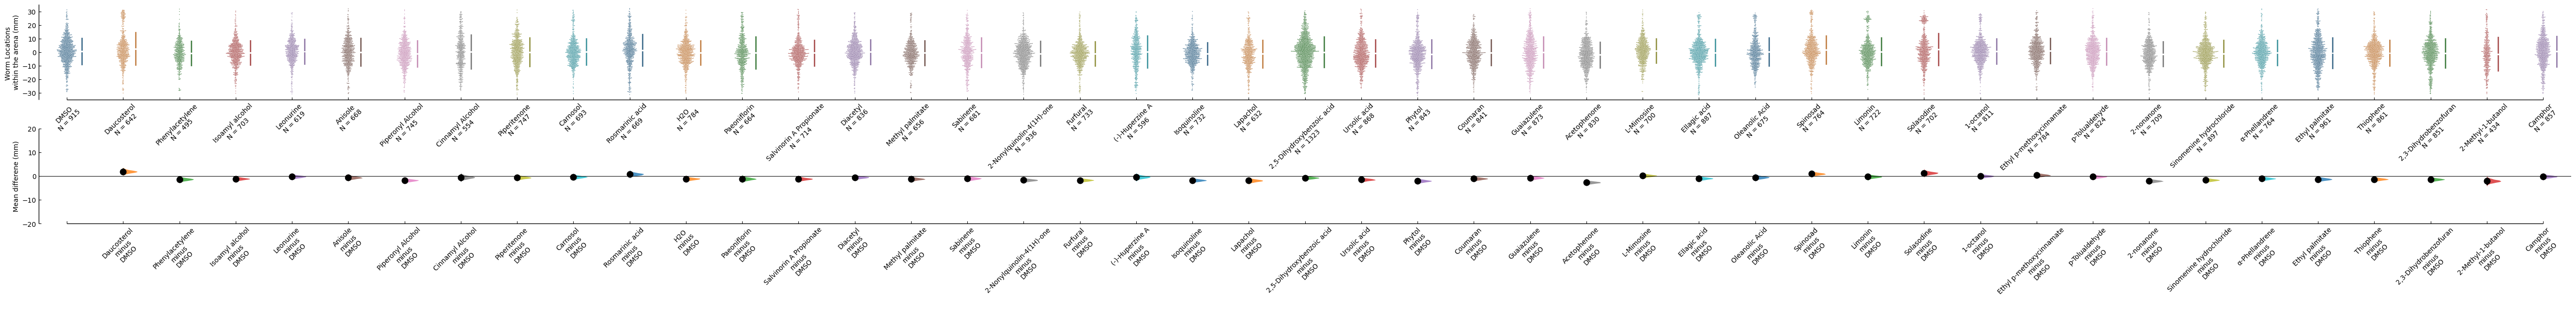

In [92]:
mm_obj_plot = mm_obj.mean_diff.plot(raw_marker_size=1, swarm_label = 'Worm Locations \nwithin the arena (mm)', 
                                        contrast_label="Mean differene (mm)", contrast_ylim = (-20,20), swarm_ylim=(-35,35))

#Accessing plot axes to control plot asthetics
rawswarm_axes = mm_obj_plot.axes[0]
contrast_axes = mm_obj_plot.axes[1]

rawswarm_axes.yaxis.set_tick_params(tickdir='in')
rawswarm_axes.xaxis.set_tick_params(tickdir='in', rotation=45)

contrast_axes.yaxis.set_tick_params(tickdir='in')
contrast_axes.xaxis.set_tick_params(tickdir='in', rotation=45)
#plt.rcParams['svg.fonttype'] = 'none'

In [23]:
GN960_df_mm = mm_obj.mean_diff.results
GN960_df_mm.to_csv('C:/Users/Emily/Desktop/current_analysis/S1F2/GN960_H2O_mdiff.csv')

In [24]:
dmso = pd.read_csv('C:/Users/Emily/Desktop/current_analysis/S1F2/GN960_mdiff.csv')
all_refs = dmso.append(GN960_df_mm)
all_refs.to_csv('C:/Users/Emily/Desktop/current_analysis/S1F2/GN960_mdiff_h2odmso.csv')

In [88]:
mm_df.to_csv('C:/Users/Emily/Desktop/current_analysis/S1F2/GN960_xs.csv')

In [4]:
cols = list(CXmm_df.columns)
cols.insert(0, cols.pop(cols.index('DMSO')))
print(cols)

['DMSO', 'Carnosol', 'Limonin', 'H2O', 'Isoquinoline', '2-Nonylquinolin-4(1H)-one', 'Lapachol', 'Acetophenone', '1-octanol', 'Furfural', 'Camphor', 'Thiophene', 'Solasodine', 'Salvinorin A Propionate', 'Sinomenine hydrochloride', 'Diacetyl', '2,5-Dihydroxybenzoic acid', 'Coumaran', 'p-Tolualdehyde', 'Isoamyl alcohol', '2,3-Dihydrobenzofuran', 'Piperitenone', 'Guaiazulene', 'Oleanolic Acid', 'Sabinene', 'Spinosad', 'L-Mimosine', 'Phenylacetylene', 'Rosmarinic acid', '2-nonanone', 'Daucosterol', 'Leonurine', 'Cinnamyl Alcohol', '(-)-Huperzine A', '2-Methyl-1-butanol', 'Paeoniflorin', 'Ursolic acid', 'Ethyl palmitate', 'Piperonyl Alcohol', 'Anisole', 'α-Phellandrene', 'Ethyl p-methoxycinnamate', 'Phytol', 'Methyl palmitate', 'Ellagic acid']


In [49]:
cx10_mm_obj = db.load(CXmm_df, idx=(cols))
cx10_df_mm =cx10_mm_obj.mean_diff.results
cx10_df_mm.to_csv('D:/_2021_08_screen/S1fu/150_CX10_meandif.csv')

In [50]:
pr678_mm_obj = db.load(PRmm_df, idx=(cols))
pr678_df_mm = pr678_mm_obj.mean_diff.results
pr678_df_mm.to_csv('D:/_2021_08_screen/S1fu/150_PR678_meandif.csv')

In [5]:
def mean_diff_calc(df, ref):
    cols = list(df.columns)
    cols.insert(0, cols.pop(cols.index(ref)))
    db_obj = db.load(df, idx=(cols))
    results_df = db_obj.mean_diff.results
    return results_df

In [12]:
refs = ['DMSO', 'H2O', 'Diacetyl', 'Isoamyl alcohol', '1-octanol', '2-nonanone']
cx10_all_refs = pd.DataFrame()
for r in refs:
    mdiff = mean_diff_calc(CXmm_df, r)
    cx10_all_refs = cx10_all_refs.append(mdiff)
cx10_all_refs.to_csv('D:/_2021_08_screen/S1fu/cx10_allrefs.csv')


In [11]:
PR678_all_refs = pd.DataFrame()
for r in refs:
    mdiff = mean_diff_calc(PRmm_df, r)
    PR678_all_refs = PR678_all_refs.append(mdiff)
PR678_all_refs.to_csv('D:/_2021_08_screen/S1fu/PR678_allrefs.csv')

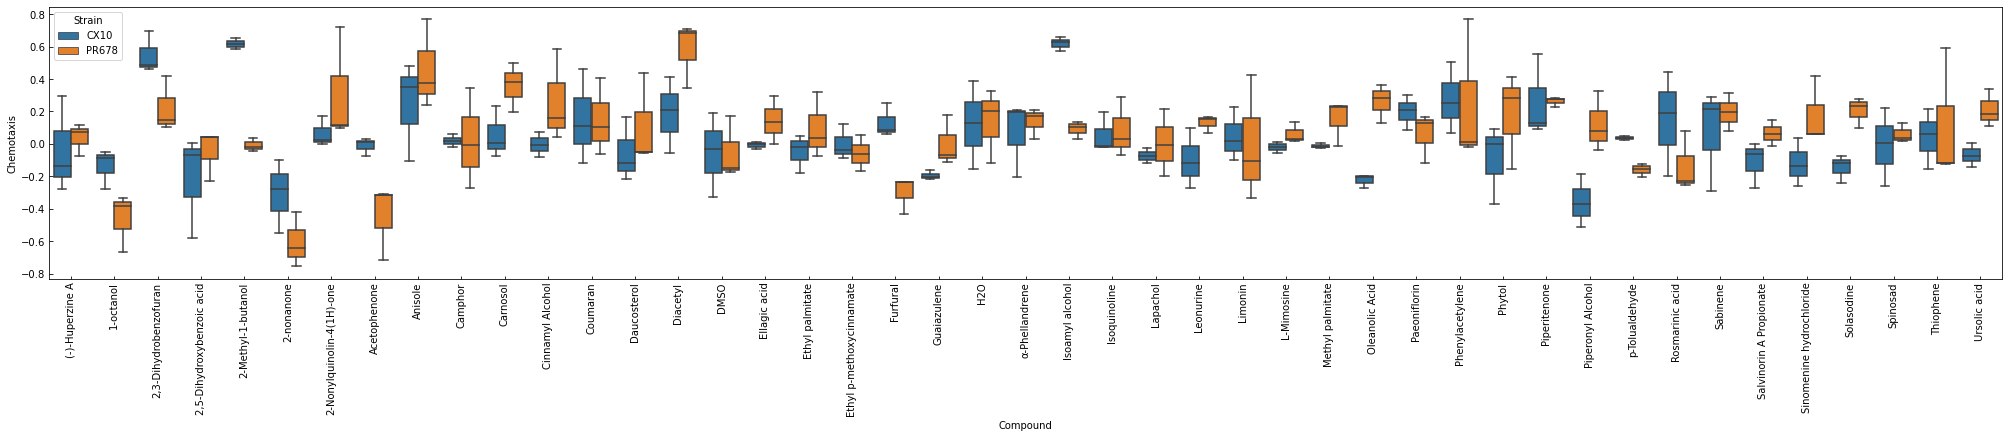

In [161]:
fig, ax = fig, ax = plt.subplots(figsize=(35,5))
sns.boxplot(data=filtered, x='Compound', y='Chemotaxis', hue='Strain', ax=ax )
ax.tick_params(axis='x', labelrotation=90, direction='in')
ax.tick_params(axis='y', direction='in')
#fig.savefig('D:/_2021_08_screen/S1fu/all_comps.png', dpi=300)

In [78]:

pr_ref_df = pr678_df_mm[pr678_df_mm['test'].isin(refs)]

pr_ref_df['test'] = pd.Categorical(pr_ref_df['test'], refs)
pr_ref_df

C:\ProgramData\Anaconda3\envs\neuroplant\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,...,resamples,random_seed,pvalue_permutation,permutation_count,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
1,DMSO,1-octanol,851,668,mean difference,False,-3.953032,95,-5.293354,-2.707069,...,5000,12345,0.0,5000,1.940105e-09,6.040730,2.570381e-09,5.992922,4.766293e-09,333919.0
5,DMSO,2-nonanone,851,767,mean difference,False,-6.325735,95,-7.514221,-5.133704,...,5000,12345,0.0,5000,1.467615e-24,10.398968,3.142214e-24,10.321014,9.336639e-23,418501.0
14,DMSO,Diacetyl,851,710,mean difference,False,9.447680,95,8.162622,10.738549,...,5000,12345,0.0,5000,1.732651e-44,-14.455560,2.883483e-44,-14.406118,2.001945e-41,182543.0
20,DMSO,H2O,851,523,mean difference,False,3.815697,95,2.391063,5.156433,...,5000,12345,0.0,5000,7.866413e-08,-5.405207,1.104554e-07,-5.336983,1.030748e-06,187646.0
22,DMSO,Isoamyl alcohol,851,889,mean difference,False,3.360917,95,2.089409,4.599195,...,5000,12345,0.0,5000,1.156460e-07,-5.322538,1.161310e-07,-5.321735,5.691992e-07,325871.0


In [79]:
cx_ref_df = cx10_df_mm[cx10_df_mm['test'].isin(refs)]

cx_ref_df['test'] = pd.Categorical(cx_ref_df['test'], refs)
cx_ref_df

C:\ProgramData\Anaconda3\envs\neuroplant\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,...,resamples,random_seed,pvalue_permutation,permutation_count,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
1,DMSO,1-octanol,936,806,mean difference,False,-1.173355,95,-2.655425,0.347436,...,5000,12345,0.1274,5000,1.266346e-01,1.528241,1.297979e-01,1.515617,2.396278e-01,389518.0
5,DMSO,2-nonanone,936,861,mean difference,False,-3.744640,95,-5.228813,-2.159922,...,5000,12345,0.0000,5000,1.834243e-06,4.786742,1.908140e-06,4.778675,2.985983e-06,454285.0
14,DMSO,Diacetyl,936,861,mean difference,False,3.997838,95,2.467943,5.489077,...,5000,12345,0.0000,5000,4.239087e-07,-5.076741,4.366735e-07,-5.070958,5.360118e-07,347862.0
20,DMSO,H2O,936,909,mean difference,False,2.071254,95,0.553972,3.540891,...,5000,12345,0.0078,5000,6.312916e-03,-2.734214,6.373819e-03,-2.731031,5.258723e-03,393484.0
22,DMSO,Isoamyl alcohol,936,711,mean difference,False,11.387340,95,9.915606,12.882325,...,5000,12345,0.0000,5000,5.840411e-49,-15.207184,2.482915e-46,-14.748838,1.347746e-41,203582.0


In [80]:
combined = pr_ref_df.append(cx_ref_df)
combined

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,...,resamples,random_seed,pvalue_permutation,permutation_count,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
1,DMSO,1-octanol,851,668,mean difference,False,-3.953032,95,-5.293354,-2.707069,...,5000,12345,0.0000,5000,1.940105e-09,6.040730,2.570381e-09,5.992922,4.766293e-09,333919.0
5,DMSO,2-nonanone,851,767,mean difference,False,-6.325735,95,-7.514221,-5.133704,...,5000,12345,0.0000,5000,1.467615e-24,10.398968,3.142214e-24,10.321014,9.336639e-23,418501.0
14,DMSO,Diacetyl,851,710,mean difference,False,9.447680,95,8.162622,10.738549,...,5000,12345,0.0000,5000,1.732651e-44,-14.455560,2.883483e-44,-14.406118,2.001945e-41,182543.0
20,DMSO,H2O,851,523,mean difference,False,3.815697,95,2.391063,5.156433,...,5000,12345,0.0000,5000,7.866413e-08,-5.405207,1.104554e-07,-5.336983,1.030748e-06,187646.0
22,DMSO,Isoamyl alcohol,851,889,mean difference,False,3.360917,95,2.089409,4.599195,...,5000,12345,0.0000,5000,1.156460e-07,-5.322538,1.161310e-07,-5.321735,5.691992e-07,325871.0
1,DMSO,1-octanol,936,806,mean difference,False,-1.173355,95,-2.655425,0.347436,...,5000,12345,0.1274,5000,1.266346e-01,1.528241,1.297979e-01,1.515617,2.396278e-01,389518.0
5,DMSO,2-nonanone,936,861,mean difference,False,-3.744640,95,-5.228813,-2.159922,...,5000,12345,0.0000,5000,1.834243e-06,4.786742,1.908140e-06,4.778675,2.985983e-06,454285.0
14,DMSO,Diacetyl,936,861,mean difference,False,3.997838,95,2.467943,5.489077,...,5000,12345,0.0000,5000,4.239087e-07,-5.076741,4.366735e-07,-5.070958,5.360118e-07,347862.0
20,DMSO,H2O,936,909,mean difference,False,2.071254,95,0.553972,3.540891,...,5000,12345,0.0078,5000,6.312916e-03,-2.734214,6.373819e-03,-2.731031,5.258723e-03,393484.0
22,DMSO,Isoamyl alcohol,936,711,mean difference,False,11.387340,95,9.915606,12.882325,...,5000,12345,0.0000,5000,5.840411e-49,-15.207184,2.482915e-46,-14.748838,1.347746e-41,203582.0


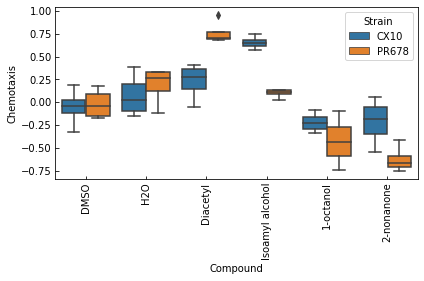

In [47]:
fig, ax = plt.subplots()
sns.boxplot(data=ref_df, x='Compound', y='Chemotaxis', hue='Strain', ax=ax )
ax.tick_params(axis='x', labelrotation=90, direction='in')
ax.tick_params(axis='y',direction='in')
fig.tight_layout()
fig.savefig('D:/_2021_08_screen/S1fu/ref_box.png', dpi = 300)